Note: you may need to restart the kernel to use updated packages.
مسار الملف المستخدم: c:\Users\PC\PycharmProjects\PythonProject10\data_intelligence_system\data\processed\clean_data.csv
✅ شكل البيانات: (1000, 7)


,id,species,color,petal_length_cm,petal_width_cm,freshness_days,is_fragrant
0,1,Sunflower,Red,6.39,2.79,9,Yes
1,2,Rose,Pink,4.57,1.09,12,Yes
2,3,Sunflower,Pink,5.69,2.53,14,Yes
3,4,Lily,Yellow,5.32,2.69,8,No
4,5,Sunflower,Yellow,7.23,2.69,10,No



🔍 معلومات الأعمدة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1000 non-null   int64  
 1   species          1000 non-null   object 
 2   color            1000 non-null   object 
 3   petal_length_cm  1000 non-null   float64
 4   petal_width_cm   1000 non-null   float64
 5   freshness_days   1000 non-null   int64  
 6   is_fragrant      1000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB

📉 جدول القيم المفقودة:


,Missing Count,Missing %



📦 توزيع القيم الفريدة (Top 20):


id                 1000
petal_length_cm     470
petal_width_cm      266
freshness_days       12
color                 6
species               5
is_fragrant           2
dtype: int64


🔢 الإحصاءات العددية:


,id,petal_length_cm,petal_width_cm,freshness_days
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,5.313620,1.906910,8.53600
std,288.819436,1.422806,0.670449,3.49985
min,1.000000,2.510000,0.530000,3.00000
25%,250.750000,4.247500,1.370000,5.00000
50%,500.500000,5.160000,1.930000,9.00000
75%,750.250000,6.232500,2.400000,11.00000
max,1000.000000,8.990000,3.500000,14.00000



🎯 العمود النوعي: species
species
Sunflower    218
Rose         209
Lily         196
Orchid       196
Tulip        181
Name: count, dtype: int64


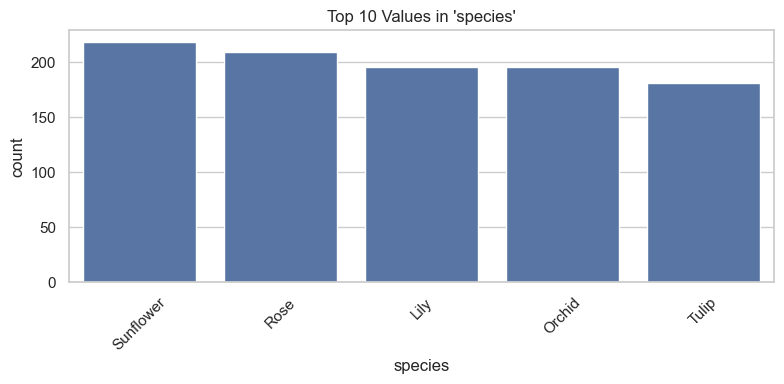


🎯 العمود النوعي: color
color
Purple    176
Pink      175
White     170
Red       166
Yellow    165
Orange    148
Name: count, dtype: int64


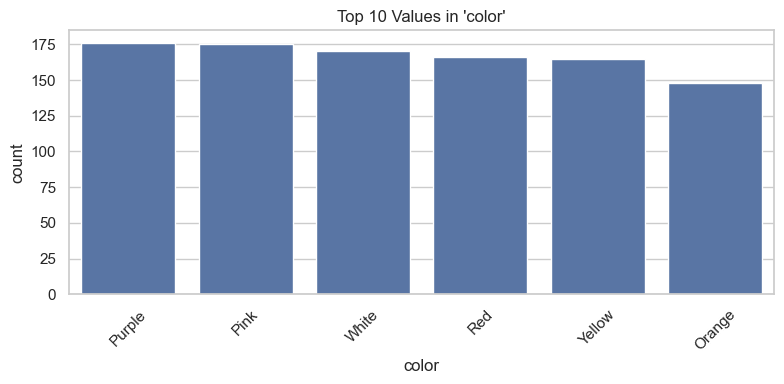


🎯 العمود النوعي: is_fragrant
is_fragrant
Yes    500
No     500
Name: count, dtype: int64


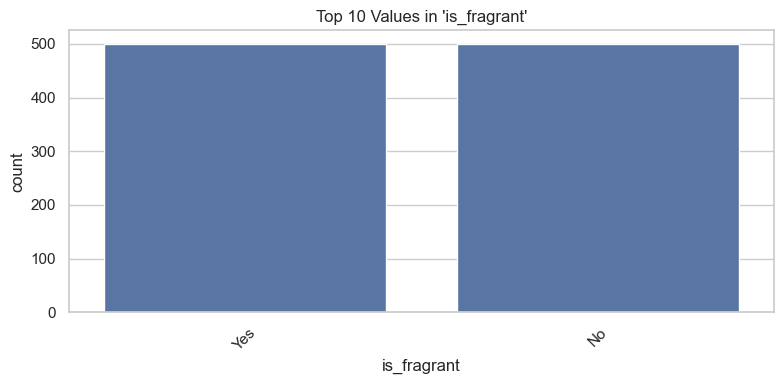

c:\Users\PC\PycharmProjects\PythonProject10\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


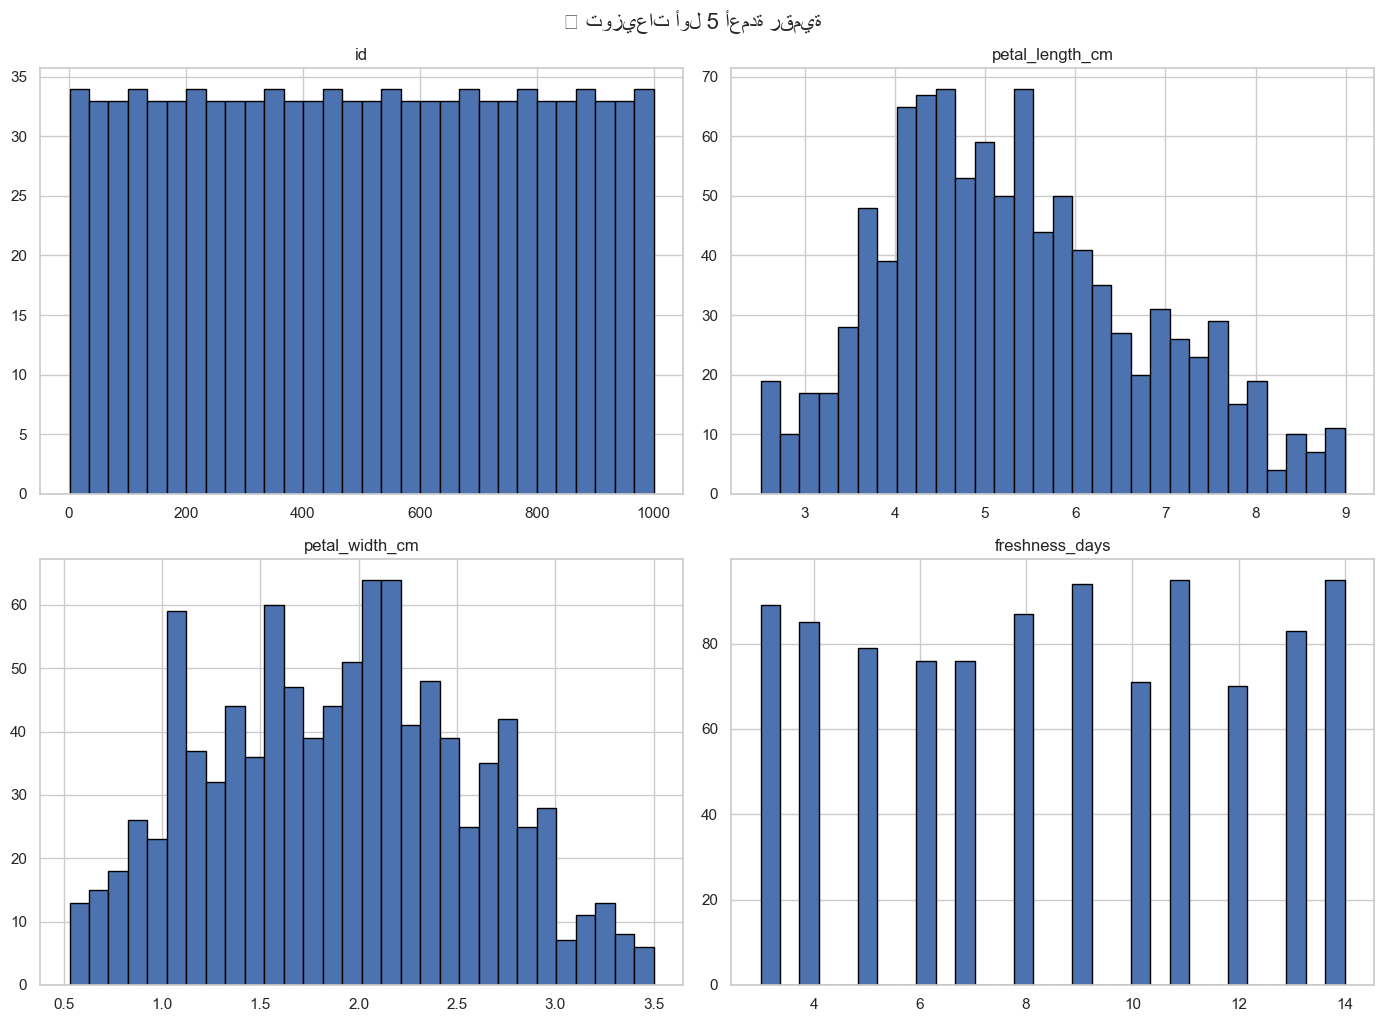


📘 تحديث سجل مصادر البيانات الخام (اختياري):
❌ خطأ أثناء تحديث سجل المصادر: No module named 'data'


In [3]:
# 📌 إعدادات أساسية
from IPython import get_ipython
try:
    get_ipython().run_line_magic("pip", "install ipython")
except:
    pass  # يعمل فقط داخل Jupyter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display
import importlib

# ⚙️ إعدادات العرض
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# 📂 تحميل البيانات المنظفة باستخدام مسار ديناميكي
try:
    # __file__ موجود: نحدد PROJECT_ROOT بناءً على موقع هذا الملف
    PROJECT_ROOT = Path(__file__).resolve().parents[1]  # نرجع للمجلد data_intelligence_system
except NameError:
    # داخل Jupyter حيث __file__ غير معرف، نستخدم cwd مباشرة
    PROJECT_ROOT = Path.cwd().parent  # نرجع مجلد أب من current working dir

DATA_PATH = PROJECT_ROOT / "data" / "processed" / "clean_data.csv"

print(f"مسار الملف المستخدم: {DATA_PATH}")
if not DATA_PATH.exists():
    raise FileNotFoundError(f"الملف غير موجود في المسار: {DATA_PATH}")

# 📥 قراءة البيانات
df = pd.read_csv(DATA_PATH)

# ✅ عرض الشكل والمحتوى العام
print("✅ شكل البيانات:", df.shape)
display(df.head())

# 🔍 معلومات الأعمدة
print("\n🔍 معلومات الأعمدة:")
df.info()

# 📉 تحليل القيم المفقودة
print("\n📉 جدول القيم المفقودة:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percent
})
missing_df = missing_df[missing_df["Missing Count"] > 0].sort_values(by="Missing %", ascending=False)
display(missing_df)

# 📦 توزيع القيم الفريدة (Top 20)
print("\n📦 توزيع القيم الفريدة (Top 20):")
unique_counts = df.nunique().sort_values(ascending=False).head(20)
display(unique_counts)

# 🔢 إحصاءات عددية
print("\n🔢 الإحصاءات العددية:")
display(df.describe(include=[np.number]))

# 🎯 الأعمدة النوعية وتوزيعها (Top 5 فقط)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols[:5]:
    print(f"\n🎯 العمود النوعي: {col}")
    print(df[col].value_counts().head(10))

    # رسم التوزيع
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top 10 Values in '{col}'", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 📊 توزيع الأعمدة الرقمية (أول 5 فقط)
numeric_cols = df.select_dtypes(include=np.number).columns[:5]
df[numeric_cols].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle("📊 توزيعات أول 5 أعمدة رقمية", fontsize=16, y=1.02)
plt.show()

# 📘 تحديث سجل المصادر (اختياري من النوتبوك)
print("\n📘 تحديث سجل مصادر البيانات الخام (اختياري):")
try:
    register_module = importlib.import_module("data.raw.register_sources")
    register_module.main()
    print("✅ تم تحديث سجل المصادر بنجاح.")
except Exception as e:
    print(f"❌ خطأ أثناء تحديث سجل المصادر: {e}")
